In [72]:
#pip install -U plotly

In [73]:
#!pip install -U kaleido

In [74]:
#!pip install ipywidgets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, ast
from google.colab import files
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Image

In [2]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.4.0


In [3]:
df_trees = pd.read_csv("/cleaned_tree_data_5.csv", encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**<h3>Average Tree Height across Neighborhoods</h3>**

In [5]:
df_height = df_trees.groupby("neighborhood")["height"].mean()
df_height = df_height.to_frame().reset_index()
df_height.columns = ['neighborhood', 'average_height']
df_height

,neighborhood,average_height
0,Allegheny Center,21.697225
1,Allegheny West,22.656178
2,Allentown,19.034898
3,Arlington,18.917664
4,Arlington Heights,42.748561
...,...,...
85,Upper Lawrenceville,23.099635
86,West End,20.215296
87,West Oakland,15.463468
88,Westwood,28.845386


In [70]:
fig=px.choropleth(df_height,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='average_height',
              color_continuous_scale='Inferno',
               title='Average Tree Height across Neighborhood' ,  
               height=700
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()
#img_bytes = fig.to_image(format="png")
#Image(img_bytes)

**<h3>Average Tree Width across Neighborhoods</h3>**

In [9]:
df_width = df_trees.groupby("neighborhood")["width"].mean()
df_width = df_width.to_frame().reset_index()
df_width.columns = ['neighborhood', 'average_width']
df_width

,neighborhood,average_width
0,Allegheny Center,6.741885
1,Allegheny West,7.798702
2,Allentown,7.388842
3,Arlington,5.454705
4,Arlington Heights,11.448097
...,...,...
85,Upper Lawrenceville,9.255260
86,West End,6.650729
87,West Oakland,5.624245
88,Westwood,8.918861


In [71]:
fig=px.choropleth(df_width,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='average_width',
              color_continuous_scale='hot',
               title='Average Tree Width across Neighborhood' ,  
               height=700
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()
#img_bytes = fig.to_image(format="png")
#Image(img_bytes)

**<h3>The most prevalent species in each neighborhood</h3>**

In [13]:
groupBySpeciesAndNeighborhood = df_trees.groupby(['neighborhood','scientific_name'])['id'].count()
groupBySpeciesAndNeighborhood = groupBySpeciesAndNeighborhood.to_frame().reset_index()
prevalent_species = groupBySpeciesAndNeighborhood.loc[groupBySpeciesAndNeighborhood.groupby(['neighborhood'])['id'].idxmax()].reset_index(drop=True)
prevalent_species

,neighborhood,scientific_name,id
0,Allegheny Center,Platanus x acerifolia,109
1,Allegheny West,Pyrus calleryana,44
2,Allentown,Pyrus calleryana,14
3,Arlington,Tsuga canadensis,14
4,Arlington Heights,Robinia pseudoacacia,2
...,...,...,...
85,Upper Lawrenceville,Pyrus calleryana,65
86,West End,Pyrus calleryana,46
87,West Oakland,Gleditsia triacanthos inermis,17
88,Westwood,Tilia cordata,29


In [14]:
fig=px.choropleth(prevalent_species,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='scientific_name',
              color_continuous_scale='Inferno',
               title='Most prevalent species in each Neighborhood' ,  
               height=700
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**<h3>Distribution of species across neighborhoods</h3>**
Run the following cell and select a species from the dropdown menu and run the following cells to visualize the distribution of the selected species across the neighborhoods of Pittsburgh.

In [50]:
#Run this cell
#Select a species from the dropdown menu
#Run the following cells
selected_spec = widgets.Dropdown(options = sorted(df_trees.scientific_name.unique()), value=None, description='Species:')
print("\nSelect a species\n")
display(selected_spec)


Select a species



Dropdown(description='Species:', options=('Abies balsamea', 'Abies concolor', 'Abies fraseri', 'Acer buergeria…

In [58]:
df_spec = df_trees.groupby(['scientific_name', 'neighborhood'])['id'].count()
df_spec = df_spec.to_frame().reset_index()
df_spec = df_spec.loc[df_spec['scientific_name'] == selected_spec.value]
#df_spec['percent'] = ((df_spec['id']/df_spec['id'].sum()) * 100)
df_spec = df_spec.rename(columns={"id": "count"})
df_spec

,scientific_name,neighborhood,count
1366,Ginkgo biloba,Allegheny Center,106
1367,Ginkgo biloba,Allegheny West,25
1368,Ginkgo biloba,Allentown,4
1369,Ginkgo biloba,Banksville,4
1370,Ginkgo biloba,Beechview,6
...,...,...,...
1425,Ginkgo biloba,Terrace Village,8
1426,Ginkgo biloba,Troy Hill,18
1427,Ginkgo biloba,Upper Lawrenceville,16
1428,Ginkgo biloba,West End,17


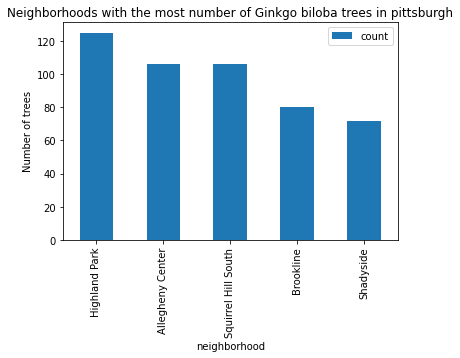

In [66]:
str1 = "Neighborhoods with the most number of " + str(selected_spec.value) + " trees in pittsburgh"
df_spec1 = df_spec.sort_values(by=['count'], ascending = False)
df_spec1 = df_spec1.head(5)
ax = df_spec1.plot.bar(x='neighborhood', y='count', rot='vertical', ylabel = 'Number of trees', title= str1)


In [68]:
full_neigh = pd.DataFrame({'neighborhood' : df_trees['neighborhood'].unique()})
full_neigh = full_neigh.rename(columns={"id": "count"})
full_neigh = full_neigh.merge(df_spec, how = 'outer', on = ['neighborhood'])
full_neigh['count'] = full_neigh['count'].fillna(0)
full_neigh = full_neigh.drop('scientific_name', 1)
full_neigh

,neighborhood,count
0,Homewood North,1.0
1,Oakwood,0.0
2,South Side Flats,38.0
3,East Allegheny,16.0
4,Highland Park,125.0
...,...,...
85,St. Clair,0.0
86,Mt. Oliver,0.0
87,Northview Heights,0.0
88,Glen Hazel,0.0


In [69]:
str2 = "Distribution of " + str(selected_spec.value) + " across neighborhoods of Pittsburgh"
fig=px.choropleth(full_neigh,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='count',
              color_continuous_scale= 'blues',
               title= str2 ,  
               height=700,
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.layout.template = None
fig.show()